<a href="https://colab.research.google.com/github/fer3her/vision-con-IA/blob/main/rreto1imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto “Imágenes y filtrado”**
Definir una secuencia de al menos 5  imágenes de satélite de diferentes fechas de la misma escena. Todos los estudiantes o grupos que conformen deben definir ubicación geográfica diferente.
* Puede tomar una sola polarización si lo desea (VV o VH), la que más le suministre información relevante para ustedes.
* Re-escalice la imagen para poder visualizarla.
* Use como apoyo el Repositorio github para rescalizado, registro y recorte como apoyo.
* No las recorte ni registre, eso va para el siguiente reto.
* Filtrar las imágenes, ya que originalmente poseen un ruido denominado speckle. Elija un filtro que considere apropiado.
* Analizar el filtrado visualmente, haciendo zoom sobre regiones de interés, observando detalles, etc.
Obtener resultados y conclusiones.


In [ ]:
# PASO 1: Librerías necesarias
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# PASO 3: Definir carpeta de imágenes
basepath = r'C:\Users\Usuario\Downloads\Imagenes reto 3 parcial -20250404T162556Z-001'

# PASO 4: Lista de nombres de 5 imágenes SAR (cambia por tus propias imágenes)
imagenes = [
    'Imagenes reto 3 parcial/s1a-iw-grd-vh-20250228t065516-20250228t065541-058093-072c89-002.tiff',
    'Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065541-20250324t065606-058443-073a8a-002.tiff',
    'Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065541-20250312t065606-058268-0733a0-002.tiff',
    'Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065516-20250324t065541-058443-073a8a-002.tiff',
    'Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065516-20250312t065541-058268-0733a0-002.tiff'
]

In [ ]:

# PASO 5: Función para reescalar imagen
def reescalar_img(img):
    img2 = img.astype(np.float32)
    escala_display = np.mean(img2) * 3.0
    min_val = np.min(img2)
    img2[img2 > escala_display] = escala_display
    img2[img2 < min_val] = 0
    img3 = 255.0 * (img2 / escala_display)
    img4 = img3.astype(np.uint8)
    return img4

# PASO 6: Filtro Lee
def filtro_lee(img, size=5):
    img = img.astype(np.float32)
    mean = cv2.blur(img, (size, size))
    mean_sq = cv2.blur(img**2, (size, size))
    variance = mean_sq - mean**2
    overall_variance = np.mean(variance)
    weights = variance / (variance + overall_variance)
    filtered = mean + weights * (img - mean)
    return filtered.astype(np.uint8)

In [ ]:
import os
import cv2
import numpy as np
import gc  # Garbage collector

# Procesar y guardar las imágenes
for nombre in imagenes:
    print(f'\nProcesando imagen: {nombre}')

    # Cargar imagen
    path_img = os.path.join(basepath, nombre)
    img = cv2.imread(path_img, cv2.IMREAD_UNCHANGED)

    if img is None:
        print(f'❌ Error al cargar la imagen: {nombre}')
        continue

    # Mostrar info básica
    print('✅ Imagen cargada')
    print('Shape:', img.shape, 'Tipo:', img.dtype)
    print('Máx:', np.max(img), 'Promedio:', np.mean(img), 'Mín:', np.min(img))

    # Reescalar y filtrar
    img_reescalada = reescalar_img(img)
    img_filtrada = filtro_lee(img_reescalada)

    # Guardar imágenes procesadas
    nombre_scaled = nombre.replace('.tiff', '_scaled.tiff')
    nombre_filtrada = nombre.replace('.tiff', '_filtrada.tiff')
    cv2.imwrite(os.path.join(basepath, nombre_scaled), img_reescalada)
    cv2.imwrite(os.path.join(basepath, nombre_filtrada), img_filtrada)

    print('✅ Imágenes guardadas correctamente')

    # Liberar memoria
    del img, img_reescalada, img_filtrada
    gc.collect()



Procesando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250228t065516-20250228t065541-058093-072c89-002.tiff
✅ Imagen cargada
Shape: (16660, 25736) Tipo: uint16
Máx: 8357 Promedio: 36.80938191409607 Mín: 0
✅ Imágenes guardadas correctamente

Procesando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065541-20250324t065606-058443-073a8a-002.tiff
✅ Imagen cargada
Shape: (16661, 25724) Tipo: uint16
Máx: 9566 Promedio: 47.02231069401724 Mín: 0
✅ Imágenes guardadas correctamente

Procesando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065541-20250312t065606-058268-0733a0-002.tiff
✅ Imagen cargada
Shape: (16661, 25727) Tipo: uint16
Máx: 9052 Promedio: 50.62944832035445 Mín: 0
✅ Imágenes guardadas correctamente

Procesando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065516-20250324t065541-058443-073a8a-002.tiff
✅ Imagen cargada
Shape: (16661, 25734) Tipo: uint16
Máx: 8314 Promedio: 34.917699784305775 Mín: 0
✅ Imágenes guardadas correctamente

Procesando imagen:

Durante el procesamiento de las imágenes Sentinel-1 en polarización VH, se observaron dimensiones consistentes entre todas las escenas (~16660 x ~25730 píxeles) y un rango dinámico amplio, con valores máximos entre 8000 y 9500. Los valores promedio de retrodispersión variaron entre aproximadamente 34 y 50, lo cual sugiere diferencias en la cobertura del terreno o en las condiciones ambientales al momento de la captura. En particular, la imagen del 12 de marzo presentó el valor promedio más alto, lo que podría indicar mayor presencia de vegetación o humedad. Estos resultados permiten identificar la riqueza de información contenida en las imágenes radar, y son fundamentales para ajustar correctamente los parámetros en procesos de filtrado, clasificación o detección de superficies


🔍 Visualizando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250228t065516-20250228t065541-058093-072c89-002.tiff


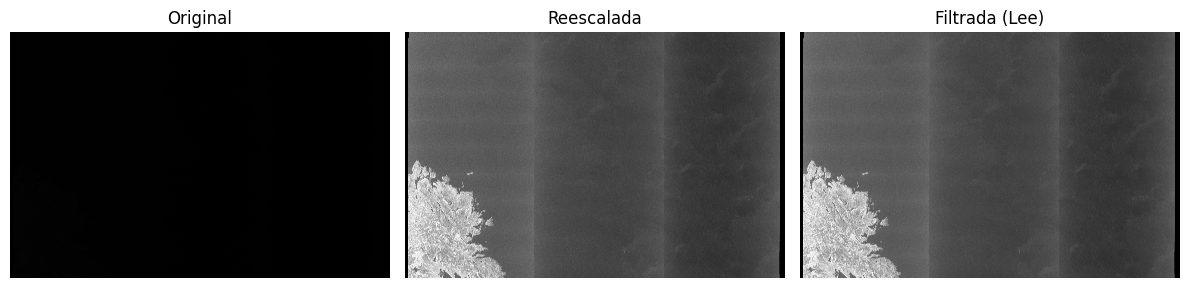


🔍 Visualizando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065541-20250324t065606-058443-073a8a-002.tiff


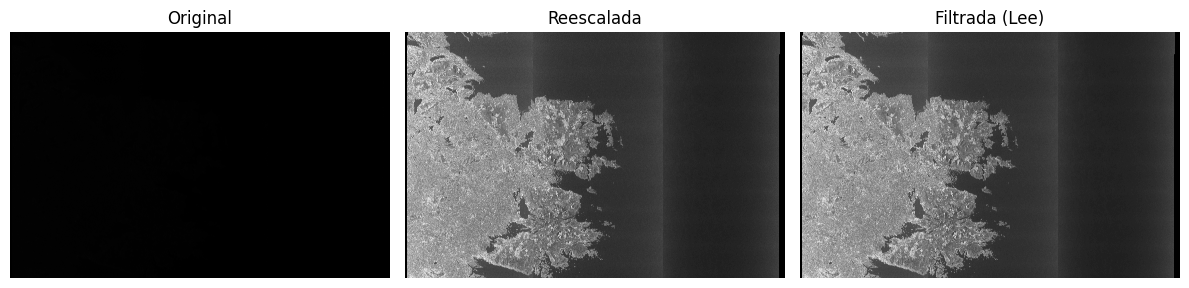


🔍 Visualizando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065541-20250312t065606-058268-0733a0-002.tiff


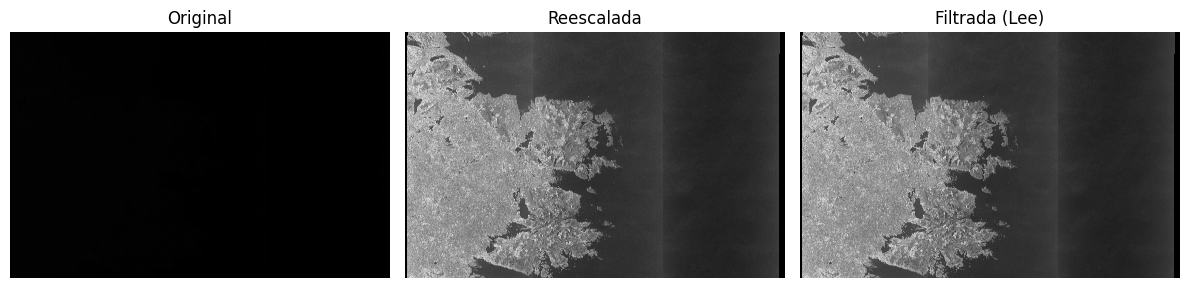


🔍 Visualizando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065516-20250324t065541-058443-073a8a-002.tiff


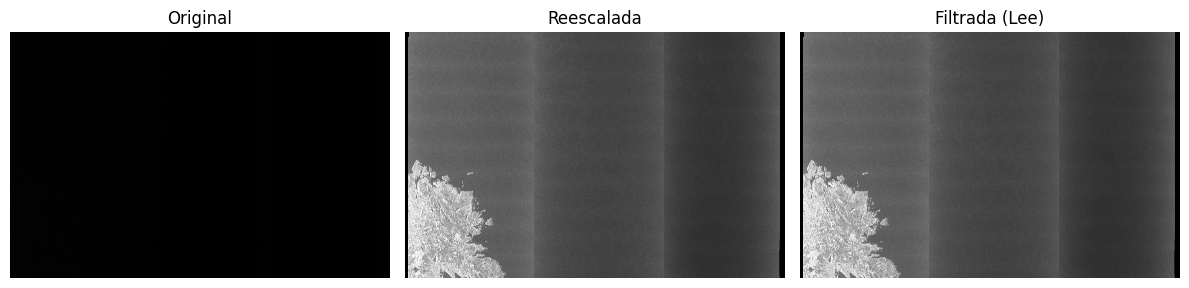


🔍 Visualizando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065516-20250312t065541-058268-0733a0-002.tiff


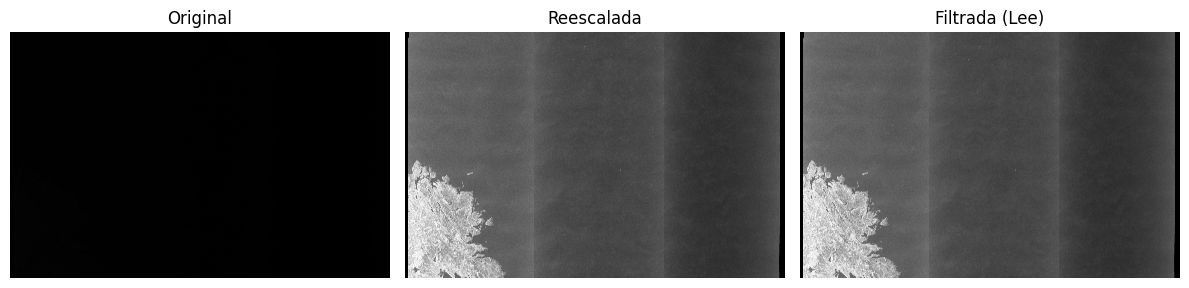

In [ ]:
import matplotlib.pyplot as plt
import gc  # Asegúrate de tenerlo importado

# Visualización de imágenes procesadas
for nombre in imagenes:
    print(f'\n🔍 Visualizando imagen: {nombre}')

    path_original = os.path.join(basepath, nombre)
    path_scaled = os.path.join(basepath, nombre.replace('.tiff', '_scaled.tiff'))
    path_filtrada = os.path.join(basepath, nombre.replace('.tiff', '_filtrada.tiff'))

    # Cargar imágenes
    img = cv2.imread(path_original, cv2.IMREAD_UNCHANGED)
    img_reescalada = cv2.imread(path_scaled, cv2.IMREAD_UNCHANGED)
    img_filtrada = cv2.imread(path_filtrada, cv2.IMREAD_UNCHANGED)

    if img is None or img_reescalada is None or img_filtrada is None:
        print('⚠️ No se pudo cargar una o más imágenes.')
        continue

    # Mostrar imágenes
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img_reescalada, cmap='gray')
    plt.title('Reescalada')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_filtrada, cmap='gray')
    plt.title('Filtrada (Lee)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Liberar memoria tras mostrar
    plt.close('all')
    del img, img_reescalada, img_filtrada
    gc.collect()


La comparación entre las tres imágenes muestra claramente la importancia del preprocesamiento en datos radar. La imagen original presenta un bajo contraste, lo que dificulta la identificación de elementos geográficos. Al aplicar la reescalación, se mejora significativamente la visibilidad de detalles como cuerpos de agua, zonas urbanas y vegetación. Finalmente, con la aplicación del filtro de Lee, se reduce el ruido speckle característico de las imágenes radar sin perder información relevante, lo que permite una visualización más limpia y adecuada para tareas de análisis y clasificación


ZOOM sobre región de interés - Imagenes reto 3 parcial/s1a-iw-grd-vh-20250228t065516-20250228t065541-058093-072c89-002.tiff


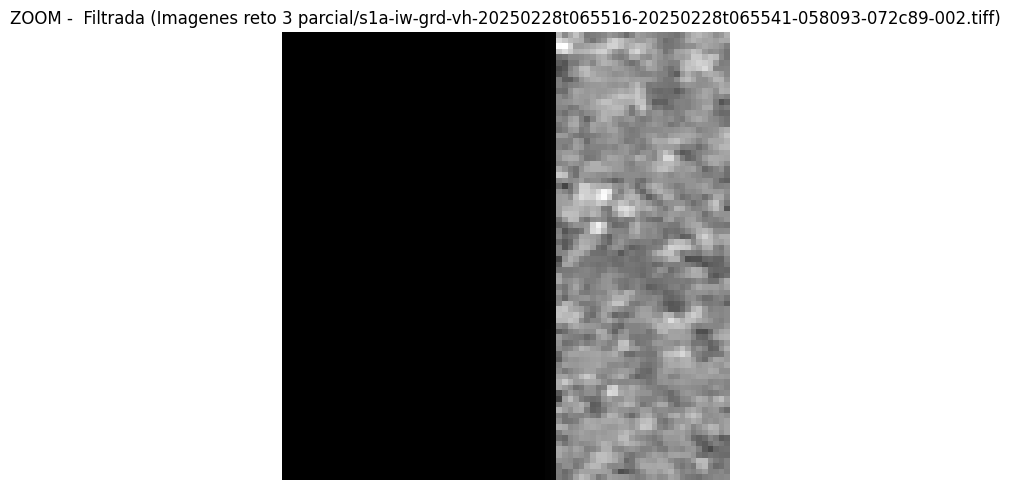


ZOOM sobre región de interés - Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065541-20250324t065606-058443-073a8a-002.tiff


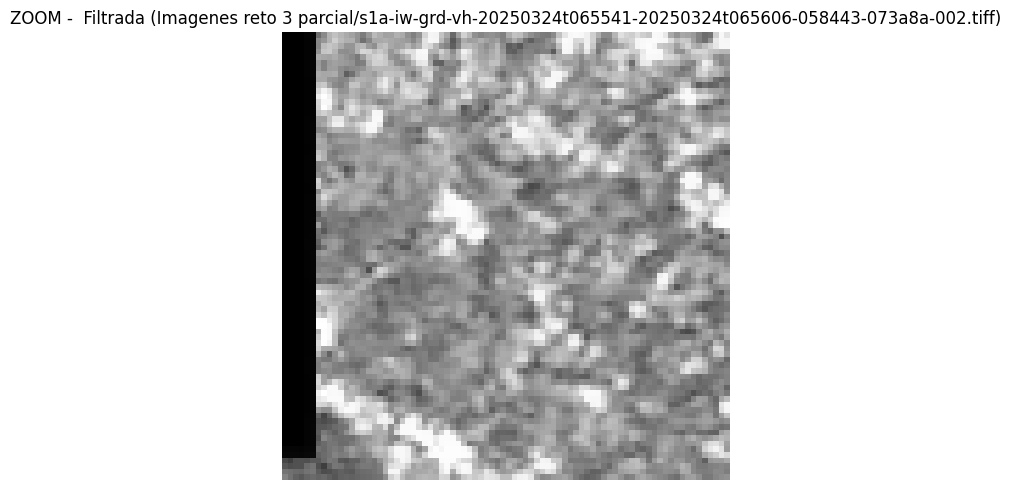


ZOOM sobre región de interés - Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065541-20250312t065606-058268-0733a0-002.tiff


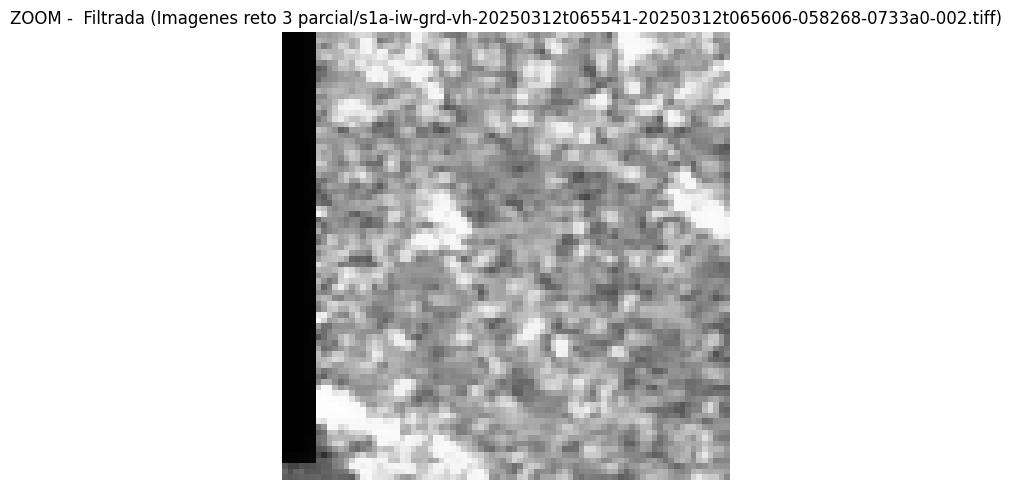


ZOOM sobre región de interés - Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065516-20250324t065541-058443-073a8a-002.tiff


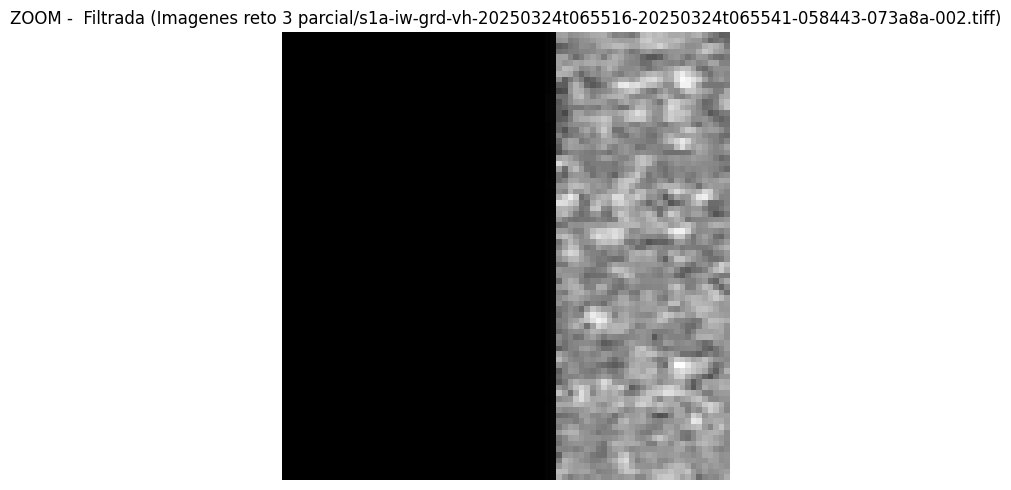


ZOOM sobre región de interés - Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065516-20250312t065541-058268-0733a0-002.tiff


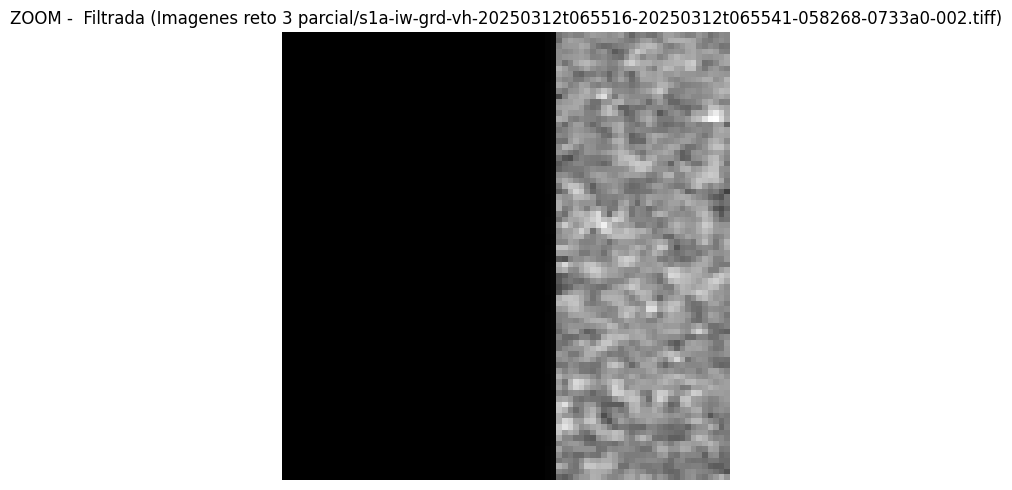

In [ ]:
# Mostrar ZOOM solo en la imagen filtrada (Lee) de cada imagen procesada
for nombre in imagenes:
    print(f'\nZOOM sobre región de interés - {nombre}')

    path_filtrada = os.path.join(basepath, nombre.replace('.tiff', '_filtrada.tiff'))
    img_filtrada = cv2.imread(path_filtrada, cv2.IMREAD_UNCHANGED)

    if img_filtrada is None:
        print(' No se pudo cargar la imagen filtrada.')
        continue

    # Coordenadas y tamaño
    x_ini, y_ini = 200, 200
    ancho, alto = 80, 80

    roi = img_filtrada[y_ini:y_ini+alto, x_ini:x_ini+ancho]

    plt.figure(figsize=(5, 5))
    plt.imshow(roi, cmap='gray')
    plt.title(f'ZOOM -  Filtrada ({nombre})')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Liberar memoria
    plt.close('all')
    del img_filtrada, roi
    gc.collect()
